# Module 9 Live Coding Assignment:
## Machine Learning

#### Dempsey Wade

In [387]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn import metrics

In [388]:
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Q1

#### Read the datasets “train.csv” and “test.csv” and save them in two variables named “df train” and “df test” respectively. Use the basic functions to get information about the data.

In [389]:
df_train = pd.read_csv('/Users/dwade/Desktop/dartmouth/train.csv')
df_test = pd.read_csv('/Users/dwade/Desktop/dartmouth/test.csv')

In [390]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [391]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [392]:
print("Test shape: ",df_test.shape)
print("Train shape: ", df_train.shape)

Test shape:  (418, 11)
Train shape:  (891, 12)


In [393]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [394]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [395]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [396]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Q2
#### Build the following plots using seaborn. Use only the df_train

In [397]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Bar plot for the “Survived” column

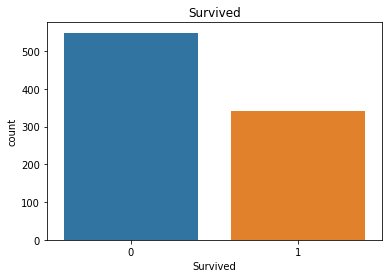

In [398]:
sns.countplot('Survived', data = df_train)
plt.title('Survived')
plt.show()

### Bar plot for the “Survived” column grouped by “Sex”

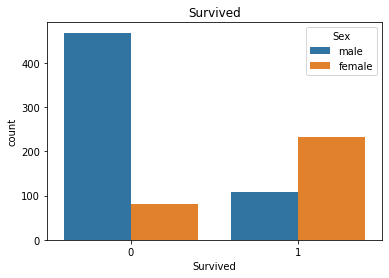

In [399]:
sns.countplot('Survived', hue='Sex', data = df_train)
plt.title('Survived')
plt.show()

### Bar plots for the “‘Pclass” column, first for only the variable, and then grouped by “Survived”. Use subplots.

Text(0.5, 1.0, 'Pclass: Survived vs Dead')

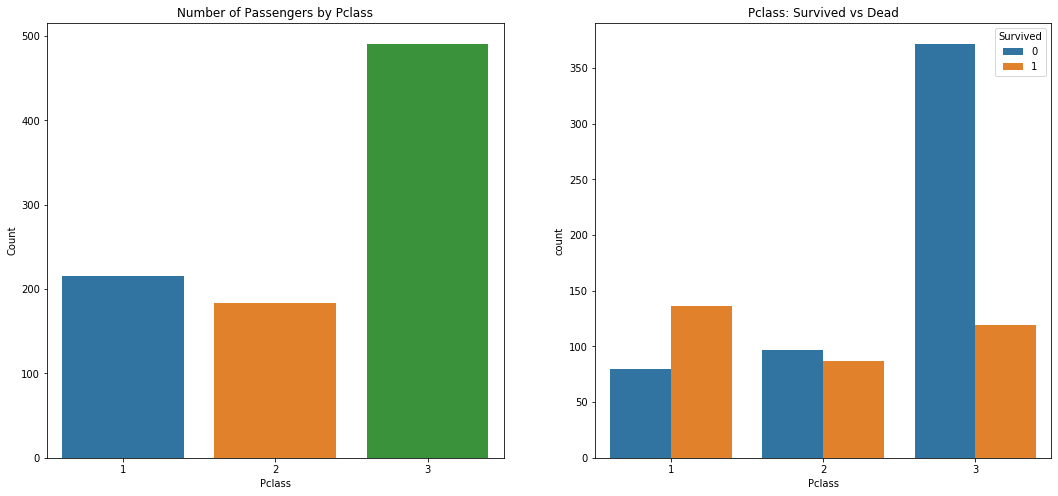

In [457]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.countplot('Pclass', data=df_train, ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

### Factorplot for “Pclass” vs. “Survived” grouped by “Sex”.

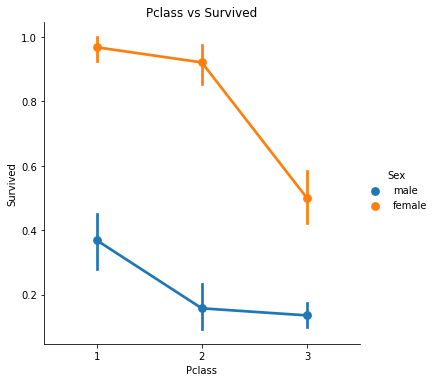

In [413]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train)
plt.title('Pclass vs Survived')
plt.show()

### Violin plot for “Age” vs. “Pclass” and “Age” vs. “Sex” grouped by “Survived”.

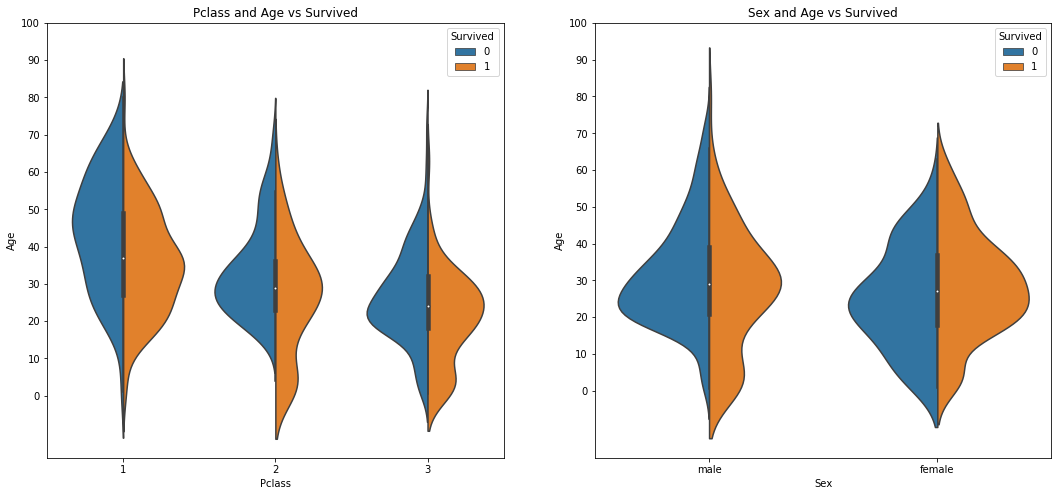

In [415]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived', data = df_train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110, 10))
plt.show()

### Factorplot for “Embarked” vs. “Survived”.

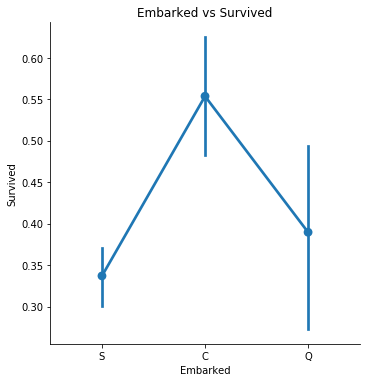

In [416]:
sns.factorplot('Embarked','Survived', data=df_train)
plt.title('Embarked vs Survived')
plt.show()

### Bar plot for “Embarked” vs. “Pclass”

Text(0.5, 1.0, 'Embarked vs Pclass')

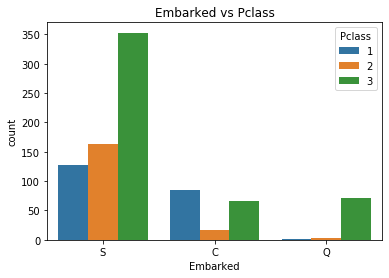

In [417]:
sns.countplot('Embarked', hue='Pclass', data = df_train)
plt.title('Embarked vs Pclass')

### Factorplot for “Survived” vs. “Pclass” grouped by “Sex”.

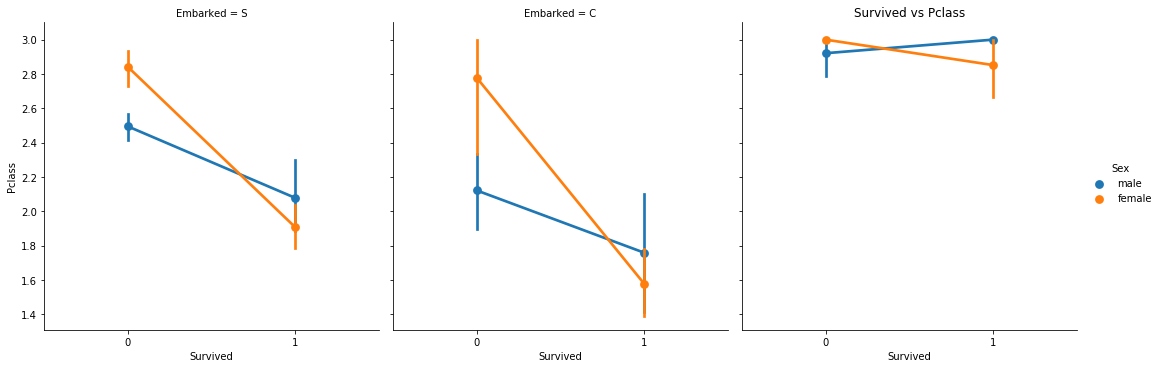

In [418]:
sns.factorplot('Survived','Pclass', col='Embarked',hue='Sex', data = df_train)
plt.title('Survived vs Pclass')
plt.show()

### Histograms for “Fare” for each “Pclass”. Use subplots.

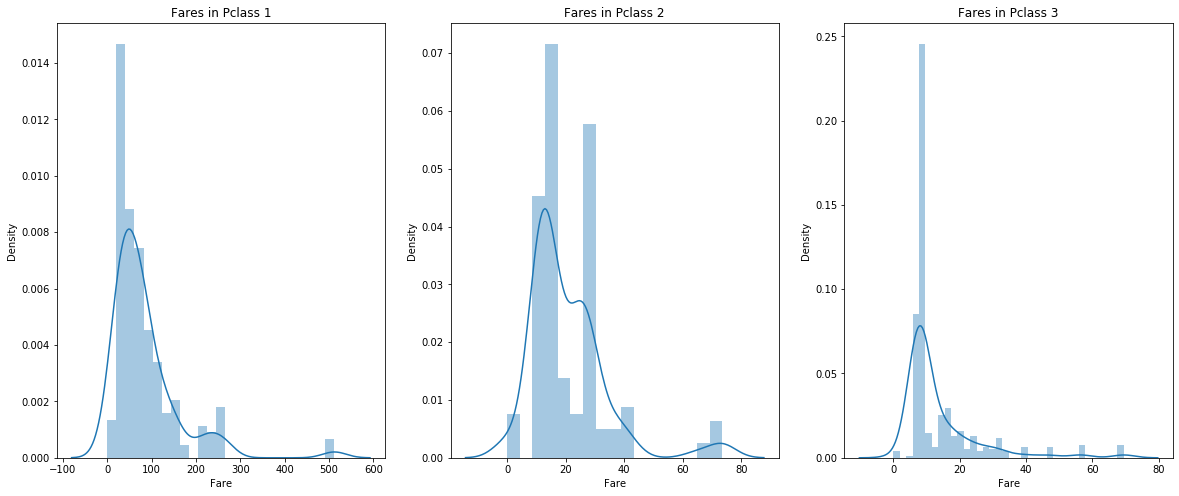

In [419]:
f, ax = plt.subplots(1, 3, figsize=(20,8))

sns.distplot(df_train[df_train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(df_train[df_train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(df_train[df_train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Q3
#### Plot the correlation matrix for the “df train” dataset.

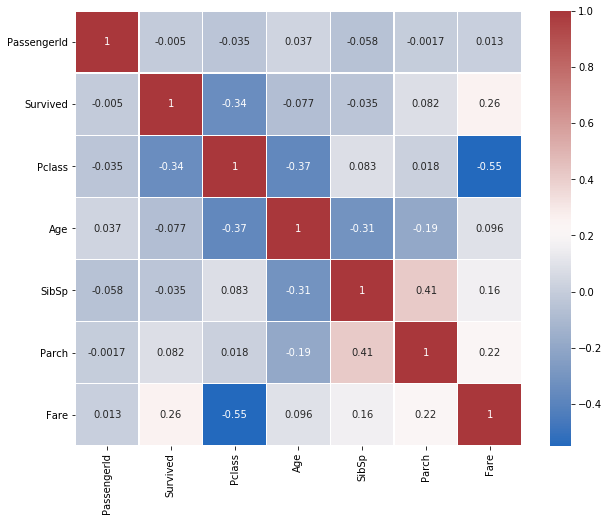

In [420]:
sns.heatmap(df_train.corr(), annot=True, cmap='vlag', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Data Cleaning and Ceature Engineering
## Q4
#### Divide the range for the “Age” column from 0-80 into 5 bins. Call the new variable “Age band”.


In [421]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [422]:
df_train['Age_band'] = 0
df_train.loc[df_train['Age']<=16, 'Age_band'] = 0
df_train.loc[(df_train['Age']>16)&(df_train['Age']<=32), 'Age_band'] = 1
df_train.loc[(df_train['Age']>32)&(df_train['Age']<=48), 'Age_band'] = 2
df_train.loc[(df_train['Age']>48)&(df_train['Age']<=64), 'Age_band'] = 3
df_train.loc[df_train['Age']>64, 'Age_band'] = 4

# LOOK UP CUT IN PYTHON

#Visualize the Age_band
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [423]:
df_train.Age_band.describe()

count    891.000000
mean       1.092031
std        0.967130
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Age_band, dtype: float64

## Q5
#### Divide the range for the “Fare” column into 4 bins. Call the new variable “Fare band”.

In [424]:
df_train[['Fare']].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [425]:
#For bin sizes at 75%
31/4

7.75

In [426]:
df_train['Fare_band'] = 0
df_train.loc[df_train['Fare']<=7.75, 'Fare_band'] = 0
df_train.loc[(df_train['Fare']>7.75)&(df_train['Fare']<=15.5), 'Fare_band'] = 1
df_train.loc[(df_train['Fare']>15.5)&(df_train['Fare']<=23.25), 'Fare_band'] = 2
df_train.loc[df_train['Fare']>24.25, 'Fare_band'] = 3

In [427]:
df_train.Fare_band.describe()

count    891.000000
mean       1.658810
std        1.147679
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        3.000000
Name: Fare_band, dtype: float64

In [428]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1


## Q6
#### Transform the “Sex”, and “Embarked” columns from string to numeric.

In [429]:
#To vizualize the types and confirm they are changed in the next cell
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_band     891 non-null    int64  
 13  Fare_band    891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [430]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1


In [431]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [432]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [433]:
#Create dictionaries
sex_dic = {'male':0,'female':1}
embarked_dic = {'S':0,'C':1,'Q':2, 'nan':0}

#Convert to numeric
df_train['Sex'] = df_train['Sex'].astype(str)
df_train['Embarked'] = df_train['Embarked'].astype(str)
df_train['Sex'] = [sex_dic[x] for x in df_train.Sex]
df_train['Embarked'] = [embarked_dic[x] for x in df_train.Embarked]

In [434]:
#To confirm that Sex, Embarked, initial are types int
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Age_band     891 non-null    int64  
 13  Fare_band    891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [435]:
df_train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [436]:
df_train.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

## Q7
#### Drop unnecessary columns: “Name”,“Age”,“Ticket”,“Fare”,“Cabin”, “PassengerId”. Then, plot the correlation matrix for the final “df train” dataset.

In [437]:
df_train = df_train.drop(['Name', 'Age', 'Ticket', 
                           'Fare', 'Cabin', 'PassengerId'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_band
0,0,3,0,1,0,0,1,0
1,1,1,1,1,0,1,2,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,2,3
4,0,3,0,0,0,0,2,1


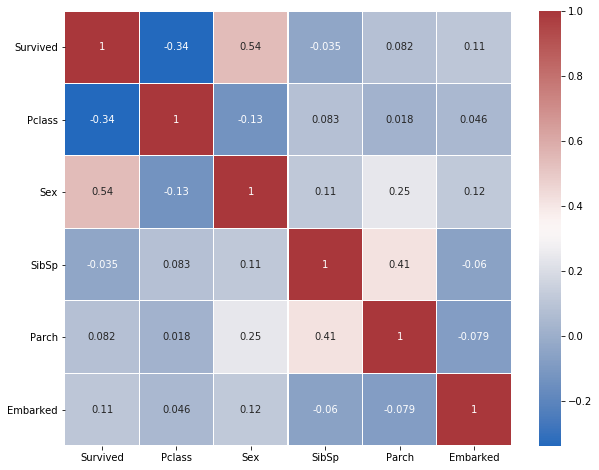

In [438]:
sns.heatmap(df_train2.corr(), annot=True, cmap='vlag', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Modeling

#### Important note: We will only be using the “df train” dataset for modeling. You should transform your “df test” to be able to use it as a separate testing dataset.

## Q8
#### Separate your data into a train and test datasets using “scikit-learn”, and stratify by “Sur- vived”.

In [439]:
 from sklearn.model_selection import train_test_split

In [441]:
train, test =train_test_split(df_train, test_size = 0.3, random_state=0,
                            stratify=df_train['Survived'])
X_train = train[train.columns[1:]]
X_test = test[test.columns[1:]]

y_train = train[train.columns[:1]]
y_test = test[test.columns[:1]]

x=df_train[df_train.columns[1:]]
y=df_train['Survived']

## Q9
#### Build the following models using ”scikit-learn”:

In [442]:
from sklearn.metrics import accuracy_score

#### Linear-SVM
##### Accuracy

In [443]:
from sklearn import svm

model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train, y_train)

y_true_SVM = model.predict(X_test)
print('The accuracy score for Linear_SVM is',
      accuracy_score(y_test, y_true_SVM))

The accuracy score for Linear_SVM is 0.7910447761194029


#### Logistic Regression
##### Accuracy

In [445]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_true_LR = model.predict(X_test)

print('The accuracy score for Logistic Regression is',
      accuracy_score(y_test, y_true_LR))

The accuracy score for Logistic Regression is 0.7985074626865671


#### Decision Tree
##### Accuracy

In [446]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_true_DT = model.predict(X_test)
print('The accuracy score for Decision Tree is',
      accuracy_score(y_test, y_true_DT))

The accuracy score for Decision Tree is 0.7947761194029851


#### K-Nearest Neighbours(KNN)
##### Accuracy

In [447]:
from sklearn.neighbors import KNeighborsClassifier

#Test with different number of neighbors

scores = []

for i in range(1, 50, 1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    y_true_KNN = model.predict(X_test)
    temp_score = accuracy_score(y_test, y_true_KNN)
    scores.append(temp_score)
    
y_true_KNN = max(scores)
KNN_score_neighbors = scores.index(max(scores))+1

print('The most accurate score for KNN is', 
      y_true_KNN,'with',KNN_score_neighbors,'neighbors')

The most accurate score for KNN is 0.8208955223880597 with 7 neighbors


#### Gaussian Naive Bayes
##### Accuracy

In [448]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_true_NB = model.predict(X_test)
print('The accuracy score for Naive Bayes is',
      accuracy_score(y_test, y_true_NB))

The accuracy score for Naive Bayes is 0.7723880597014925


#### Random Forest
##### Accuracy

In [449]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_true_RF = model.predict(X_test)
print('The accuracy score for Random Forest is',
      accuracy_score(y_test, y_true_RF))

The accuracy score for Random Forest is 0.8246268656716418


In [450]:
#All Accuracy Scores:
   
print('The accuracy score for Linear_SVM is',
      accuracy_score(y_test, y_true_SVM))
print('The accuracy score for Logistic Regression is',
      accuracy_score(y_test, y_true_LR))
print('The accuracy score for Decision Tree is',
      accuracy_score(y_test, y_true_DT))
print('The most accurate score for KNN is', 
      y_true_KNN,'with',KNN_score_neighbors,'neighbors')
print('The accuracy score for Naive Bayes is',
      accuracy_score(y_test, y_true_NB))
print('The accuracy score for Random Forest is',
      accuracy_score(y_test, y_true_RF))

The accuracy score for Linear_SVM is 0.7910447761194029
The accuracy score for Logistic Regression is 0.7985074626865671
The accuracy score for Decision Tree is 0.7947761194029851
The most accurate score for KNN is 0.8208955223880597 with 7 neighbors
The accuracy score for Naive Bayes is 0.7723880597014925
The accuracy score for Random Forest is 0.8246268656716418


## Q10
#### Run a K-fold cross-validation for each one of the models above. Save the mean accuracy and standard deviation of each CV in a dataframe called ”models df”. Then, see your dataframe, and do a boxplot for the accuracy for each model.

In [451]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

train, test =train_test_split(df_train, test_size = 0.3, random_state=0,
                            stratify=df_train['Survived'])

X = train[train.columns[1:]]
y = train[train.columns[:1]]

kfold = KFold(n_splits = 10, random_state = 123)
mean = []
acc = []
std = []
classifiers = ['Linear_SVM','Logistic Regression','Decision Tree',
              'KNN','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear',C=0.1,gamma=0.1), LogisticRegression(), 
        DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=7),
       GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    mean.append(cv_result.mean())
    acc.append(cv_result)
    std.append(cv_result.std())

models_df = pd.DataFrame({'CV Mean':mean, 'Std':std}, index = classifiers)
models_df

,CV Mean,Std
Linear_SVM,0.784895,0.053415
Logistic Regression,0.788044,0.047243
Decision Tree,0.776831,0.039979
KNN,0.775192,0.027503
Naive Bayes,0.765566,0.041141
Random Forest,0.781695,0.037398


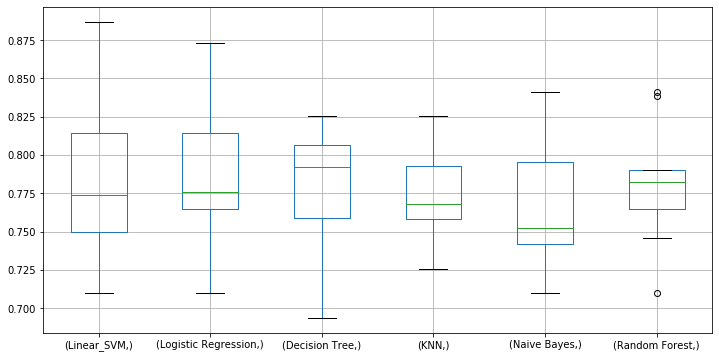

In [452]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(acc, index = [classifiers])
box.T.boxplot()
plt.show()

## Q11
#### Plot the confusion matrix for each of your models.

In [453]:
from sklearn.metrics import confusion_matrix

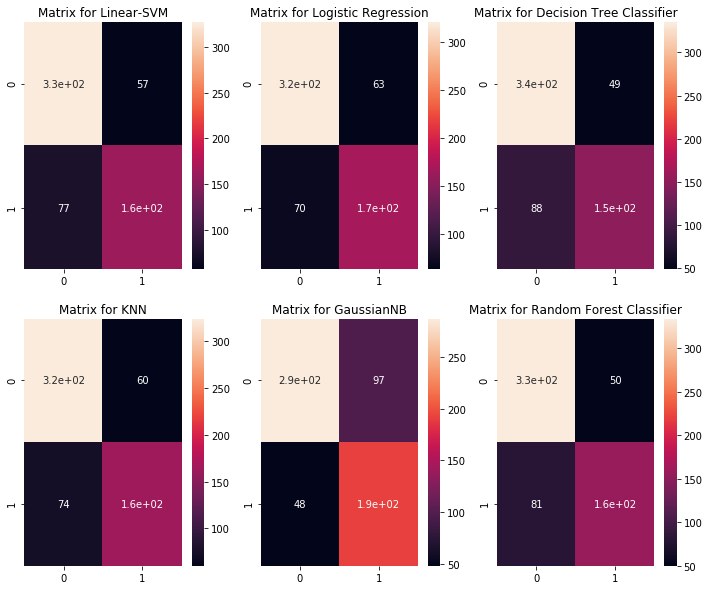

In [454]:
models=[svm.SVC(kernel='linear',C=0.1,gamma=0.1), LogisticRegression(), 
        DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=7),
       GaussianNB(), RandomForestClassifier(n_estimators=100)]

f, ax = plt.subplots(2,3,figsize=(12,10))

y_pred = cross_val_predict(models[0], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0], annot=True)
ax[0,0].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(models[1], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,1], annot = True)
ax[0,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(models[2], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,2], annot = True)
ax[0,2].set_title('Matrix for Decision Tree Classifier')

y_pred = cross_val_predict(models[3], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,0], annot = True)
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(models[4], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,1], annot = True)
ax[1,1].set_title('Matrix for GaussianNB')

y_pred = cross_val_predict(models[5], X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,2], annot = True)
ax[1,2].set_title('Matrix for Random Forest Classifier')

plt.show()

In [458]:
arr = [[9225, 575],
      [28,172]]

In [467]:
precision = 9225 / (9225 + 28)
precision

0.9969739543931698

In [461]:
recall = 9225 / (9225 + 575)
recall

0.9413265306122449

In [466]:
9225/(9225+28)

0.9969739543931698